In [1]:
#Task 2:- Social Media Sentiment Analysis

In [38]:
#Importing necessary modules
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [4]:
#Loading the dataset
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
#Predefining the size of the plots
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

1. Data Exploration

<Axes: ylabel='count'>

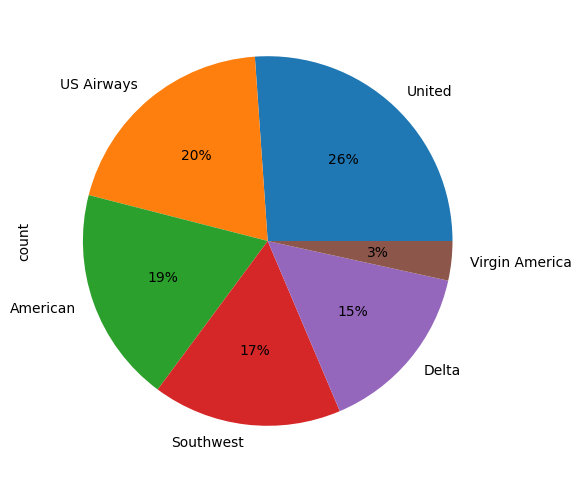

In [8]:
#Plotting a pie chart for visualising the number of tweets for each airline
df.airline.value_counts().plot(kind = "pie", autopct = "%1.0f%%")

<Axes: ylabel='count'>

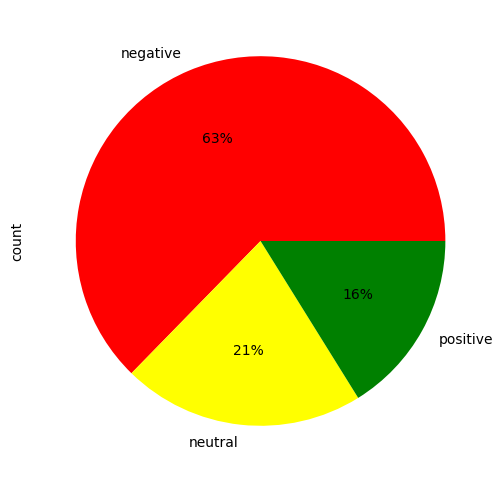

In [10]:
#Plotting a pie chart for visualising the distribution of sentiments across all tweets
df.airline_sentiment.value_counts().plot(kind="pie",autopct="%1.0f%%", colors = ["red","yellow","green"])

<Axes: xlabel='airline'>

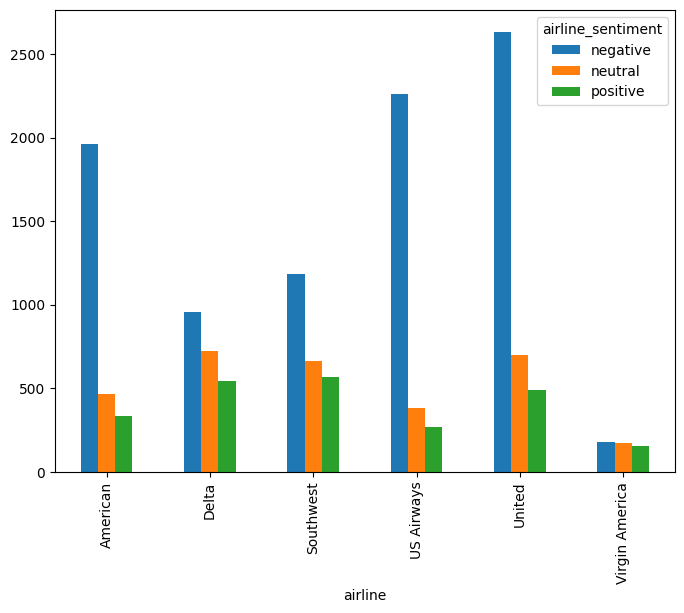

In [13]:
#Plotting a bar graph to visualise the airline sentiments for each airline
df1 = df.groupby(["airline","airline_sentiment"]).airline_sentiment.count().unstack()
df1.plot(kind = "bar")

In [14]:
#It is evident from the output that for almost alll airlines, the majority of the tweets are negative, followed by neutral and positive tweets.
#Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

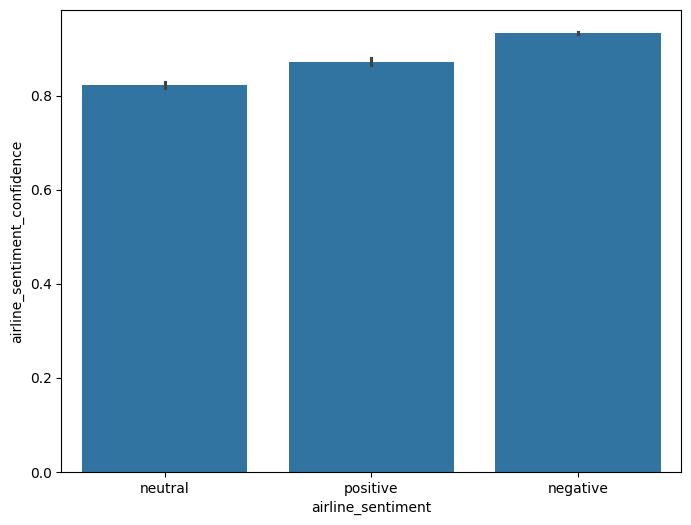

In [16]:
#Plotting a bar plot to visualise the airline sentiments
sns.barplot(x="airline_sentiment",y="airline_sentiment_confidence",data=df)


In [17]:
#From the output, we can conclude that the confidence level for negative tweets is higher compared to positive and neutral tweets

2. Data Cleaning

In [19]:
#Dividing the dataset into features which contains tweets only and labels which contain sentiments pf the tweets
features = df.iloc[:,10].values
labels = df.iloc[:,1].values

In [22]:
#Preprocessing the tweets for model training
processed_features =[]

for sentence in range(len(features)):
    processed_feature =re.sub(r'\W',' ',str(features[sentence])) #Removing all the special characters
    processed_feature =re.sub(r'\s+[a-zA-z]\s+',' ',processed_feature) #Removing all single characters
    processed_feature =re.sub(r'\^[a-zA-z]\s+',' ',processed_feature) #Removing single characters from the start
    processed_feature =re.sub(r'\s+',' ',processed_feature, flags=re.I) #Substituting multiple spaces with single space
    processed_feature =re.sub(r'\s^b\s+','',processed_feature) #Removing prefixed 'b'
    processed_feature =processed_feature.lower() #Converting to lowercase
    processed_features.append(processed_feature)

In [25]:
#Vectorizing the features
vectorizer = TfidfVectorizer(max_features=2500, min_df=7,max_df=0.8, stop_words=stopwords.words("english"))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [28]:
#Dividing the dataset into Training Dataset and Test Dataset
X_train, X_test, Y_train, Y_test = train_test_split(processed_features, labels, test_size = 0.2, random_state=0)

In [30]:
#Building and training the model
model1 = RandomForestClassifier(n_estimators=200, random_state=0)
model1.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [31]:
#Predicting from the model
predictions1 = model1.predict(X_test)

In [33]:
#Checking the accuracy of the model
print("Confusion Matrix :\n")
print(confusion_matrix(Y_test, predictions1))
print("Accuracy Score:",accuracy_score(Y_test, predictions1))

Confusion Matrix :

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
Accuracy Score: 0.7599043715846995
